In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product

In [2]:
import networkx as nx
def split_ew(G,w,ep):
    for i, (u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    for (a,b) in G.edges():
        H = G.copy()
        H.remove_edge(a,b)
        C =nx.connected_components(H)
        c= list(C)
        K = nx.Graph()
        c0= 0
        c1=0
        for u,v,d in H.edges(data=True):
            if u in c[0]:
                if v in c[0]:
                    c0= c0 + w[G[u][v]['enum']]
        for u,v,d in H.edges(data=True):
            if u in c[1]:
                if v in c[1]:
                    c1= c1 + w[G[u][v]['enum']]
        if abs(c0-c1)< ep :
            print('Splittable')
            print((a,b))

def split_dw(G,w,ep):
    unsplittable = True
    for (a,b) in G.edges():
        H = G.copy()
        H.remove_edge(a,b)
        C =nx.connected_components(H)
        c= list(C)
        c0= sum(w[u] for u in c[0])
        c1=sum(w[u] for u in c[1])
        if abs(c0-c1)< ep+1 :
            unsplittable = False
            #print('Splittable')
            #print((a,b))
    if unsplittable is True:
        print('not - splittable')
    else:
        print('splittable')

In [3]:
def svalue(G,w):
    value = sum(w)
    for (a,b) in G.edges():
        H = G.copy()
        H.remove_edge(a,b)
        C =nx.connected_components(H)
        c= list(C)
        c0= sum(w[u] for u in c[0])
        c1=sum(w[u] for u in c[1])
        if abs(c0-c1) < value :
            value = abs(c0-c1)
    return value

In [4]:
def MOD(G):
    from modulus_tools.basic_algorithm import matrix_modulus, modulus
    from modulus_tools.families.networkx_families import MinimumSpanningTree
    from minimum_degree import VertexbasedMinimumSpanningTree
    m = len(G.nodes())
    pos = nx.spring_layout(G)
    mst = VertexbasedMinimumSpanningTree(G)
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    print('modulus =', mod)
    print('rho =',rho)
    plt.figure(figsize=(6,6))
    nx.draw(G, pos, node_size=300, edge_color='black', width=2, node_color = np.around(rho,10), cmap=plt.cm.Set2)
    labels = {u:u for u in G.nodes}
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
    return mod, cons, rho, lam

modulus = 0.026666161625726777
rho = [0.02666616 0.05354065 0.04024545 0.05338914 0.05333232 0.0534649
 0.0534649  0.05335126 0.05333232 0.05278309 0.03975303]
[0.         0.         0.01624969 0.00026515 0.01090888 0.02121172
 0.00109846 0.00359842]
[1.         2.0078125  1.50923295 2.00213068 2.         2.00497159
 2.00497159 2.00071023 2.         1.97940341 1.49076705]
[[(0, 6), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (2, 4), (2, 10), (3, 9), (4, 8)], [(5, 7), (5, 9), (0, 6), (2, 10), (3, 5), (4, 10), (6, 7), (7, 8), (4, 8), (1, 5)], [(3, 9), (0, 6), (2, 10), (2, 4), (3, 8), (3, 7), (5, 9), (4, 8), (6, 7), (1, 3)], [(0, 6), (2, 10), (4, 10), (5, 9), (3, 9), (4, 8), (1, 6), (1, 8), (6, 7), (1, 5)], [(2, 10), (0, 6), (2, 4), (5, 9), (3, 9), (1, 7), (7, 8), (5, 7), (4, 8), (6, 7)], [(2, 10), (0, 6), (4, 10), (5, 9), (3, 9), (1, 5), (1, 8), (5, 7), (4, 8), (1, 6)], [(2, 10), (0, 6), (4, 10), (1, 7), (3, 7), (7, 8), (3, 9), (4, 8), (5, 7), (6, 7)], [(2, 10), (0, 6), (4, 10), (3, 9), (5, 

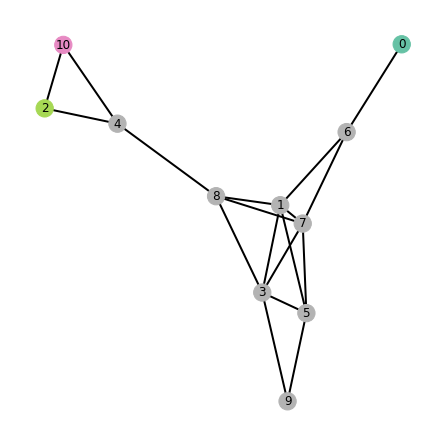

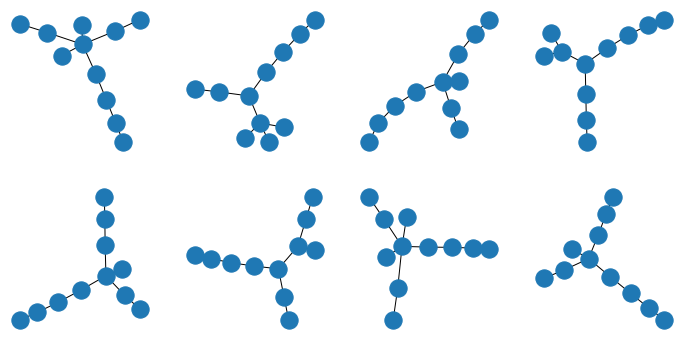

In [5]:
#G= nx.Graph()
#nx.add_path(G,(0,1,2,3,0))
#nx.add_path(G,(1,3,4,5))
#w = [1,1,1,1,1,1]
#nx.add_path(G,(0,2))
seed = 123
n=11
G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
#for u in range(n):
 #   w[u]= G.degree[u]
mod, cons, rho, lam = MOD(G)
eta = rho/mod
ncol = 4
nrow = int(np.ceil(len(cons)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
print(lam)
print(eta)
print(cons)
for i,con in enumerate(cons):
    H= nx.Graph()
    for (u,v) in con:
        H.add_edge(u,v)
    #l = np.ones(n)
    #for a in range(n):
        #l[a]= H.degree[a]
    plt.subplot(nrow,ncol,i+1)
    pos = nx.spring_layout(H)
    nx.draw(H,pos)
    split_dw(H,w,1)
    print(svalue(H,w)) 

modulus = 0.1111111111111111
rho = [0.16666667 0.16666667 0.16666667 0.16666667]
[0.         0.11111111 0.         0.11111111]
[1.5 1.5 1.5 1.5]
[[(0, 1), (0, 3), (0, 2)], [(1, 2), (2, 3), (0, 1)], [(2, 3), (0, 3), (1, 2)], [(0, 3), (0, 1), (2, 3)]]
not - splittable
2.0
splittable
0.0
splittable
0.0
splittable
0.0


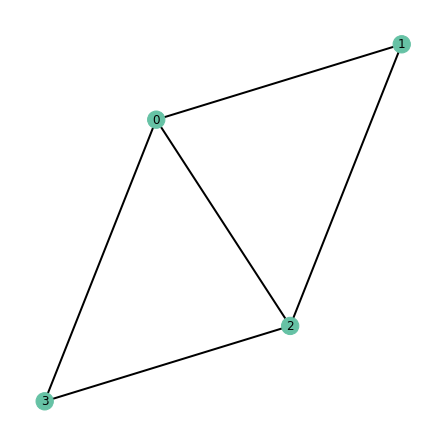

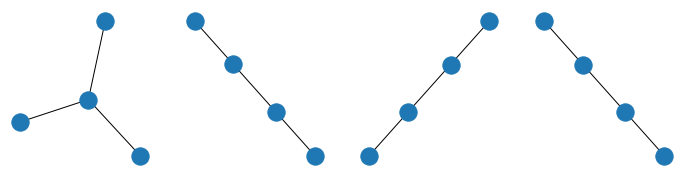

In [6]:
#G= nx.complete_graph(5)
G = nx.Graph()
nx.add_path(G,(0,1,2,3,0))
nx.add_path(G,(0,2))
#w = [1,1,1,1,1,1]
#nx.add_path(G,(0,2))
seed = 123
n= len(G.nodes())
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
#for u in range(n):
 #   w[u]= G.degree[u]
mod, cons, rho, lam = MOD(G)
eta = rho/mod
ncol = 4
nrow = int(np.ceil(len(cons)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
print(lam)
print(eta)
print(cons)
for i,con in enumerate(cons):
    H= nx.Graph()
    for (u,v) in con:
        H.add_edge(u,v)
    #l = np.ones(n)
    #for a in range(n):
        #l[a]= H.degree[a]
    plt.subplot(nrow,ncol,i+1)
    pos = nx.spring_layout(H)
    nx.draw(H,pos)
    split_dw(H,w,1)
    print(svalue(H,w)) 

modulus = 0.078125
rho = [0.125 0.125 0.125 0.125 0.125]
[0.03125 0.03125 0.03125 0.03125 0.03125]
[1.6 1.6 1.6 1.6 1.6]
[[(0, 1), (0, 2), (0, 3), (0, 4)], [(1, 2), (1, 3), (1, 4), (0, 1)], [(2, 3), (2, 4), (0, 2), (1, 2)], [(3, 4), (0, 3), (1, 3), (2, 3)], [(0, 4), (1, 4), (2, 4), (3, 4)]]
not - splittable
3.0
not - splittable
3.0
not - splittable
3.0
not - splittable
3.0
not - splittable
3.0


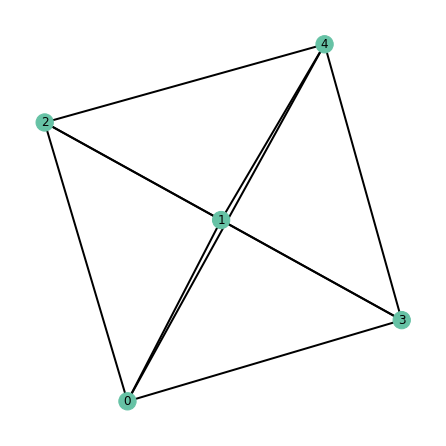

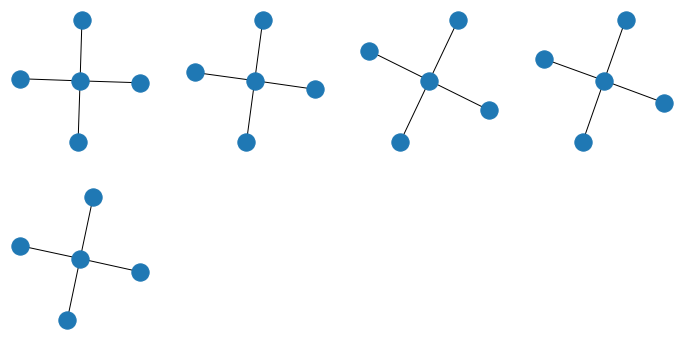

In [7]:
G= nx.complete_graph(5)
#G = nx.Graph()
#nx.add_path(G,(0,1,2,3,0))
#nx.add_path(G,(0,2))
#w = [1,1,1,1,1,1]
#nx.add_path(G,(0,2))
seed = 123
n= len(G.nodes())
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
#for u in range(n):
 #   w[u]= G.degree[u]
mod, cons, rho, lam = MOD(G)
eta = rho/mod
ncol = 4
nrow = int(np.ceil(len(cons)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
print(lam)
print(eta)
print(cons)
for i,con in enumerate(cons):
    H= nx.Graph()
    for (u,v) in con:
        H.add_edge(u,v)
    #l = np.ones(n)
    #for a in range(n):
        #l[a]= H.degree[a]
    plt.subplot(nrow,ncol,i+1)
    pos = nx.spring_layout(H)
    nx.draw(H,pos)
    split_dw(H,w,1)
    print(svalue(H,w)) 

In [8]:
def matrix_modulus(N, p=2, sigma=None):
    import cvxpy as cvx
    import numpy as np

    from warnings import warn
    
    # problem dimension
    m = N.shape[1]
    
    # set sigma to default if necessary
    if sigma is None:
        sigma = np.ones(m)
    
    # convert inputs to cvxpy constants
    N = cvx.Constant(N)
    sigma = cvx.Constant(sigma)
    
    # primal variables
    rho = cvx.Variable(m)
    
    # objective
    if p is not np.inf:
        obj = cvx.Minimize(sigma.T@rho**p)
    else:
        obj = cvx.Minimize(cvx.max(cvx.multiply(sigma, rho)))
        
    # constraints
    cons = [rho >= 0, N@rho >= 1]
    
    # set up the problem
    prob = cvx.Problem(obj, cons)
    
    # attempt to solve
    prob.solve()
    if prob.status != 'optimal':
        warn('cvxpy solve returned status {}'.format(prob.status))
        
    return prob.value, np.array(rho.value).flatten(), np.array(cons[1].dual_value).flatten()

In [9]:
def matrixtree(G):
    for i, (u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    # get a list of spanning trees
    trees = list(alg.spanning_trees(G))
    # count the number of edges
    m = len(G.nodes)
    # initialize an empty list of rows for the augmented matrix
    rows = []
    for tree in trees:
        H = nx.Graph(tree)
        row = m*[0]
        for u in H.nodes:
            row[u] = H.degree[u]
        rows.append(row) 
    return np.array(rows)

number of fair trees= 16
number of trees= 40


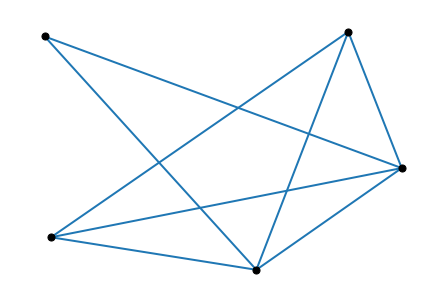

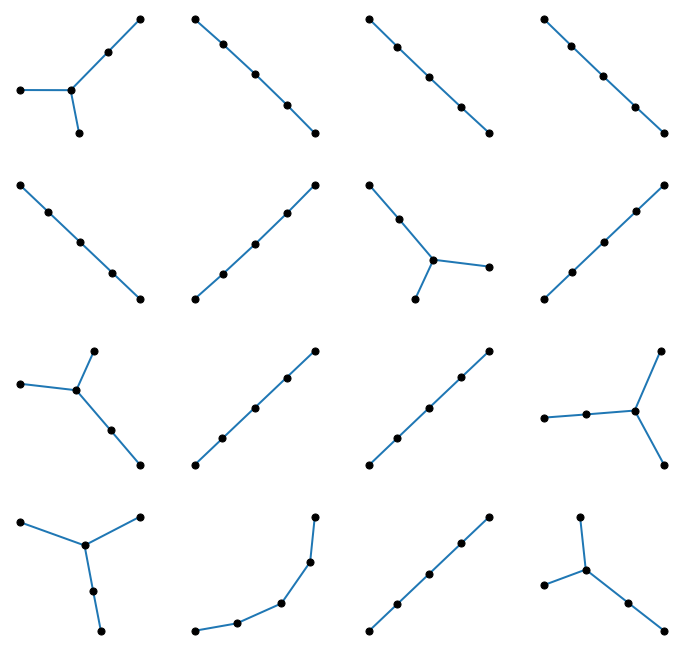

In [10]:
G = nx.random_geometric_graph(5, 0.6, seed=seed)
#G = nx.Graph()
#nx.add_path(G,(0,1,2,3,0,4,2,5,6))
#nx.add_path(G,(1,3,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
trees = list(alg.spanning_trees(G))
N = matrixtree(G)
mod,rho,lamb = matrix_modulus(N,p=2, sigma=None)
la = np.round(lamb/sum(lamb),8)
n= len(G.nodes())
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
ncol = 4
nrow = int(np.ceil(len(trees)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
a=0
for i,tree in enumerate(trees):
    if la[i]>0:
        a=a+1
        H= nx.Graph(tree)
        plt.subplot(nrow,ncol,a)
        if svalue(H,w) < 2:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
        else:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='yellow', width=2, node_color = 'black')
            print(svalue(H,w))
print('number of fair trees=',a)
print('number of trees=',len(trees))


3.0
3.0
number of fair trees= 20
number of trees= 85


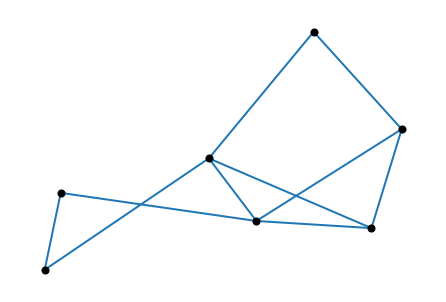

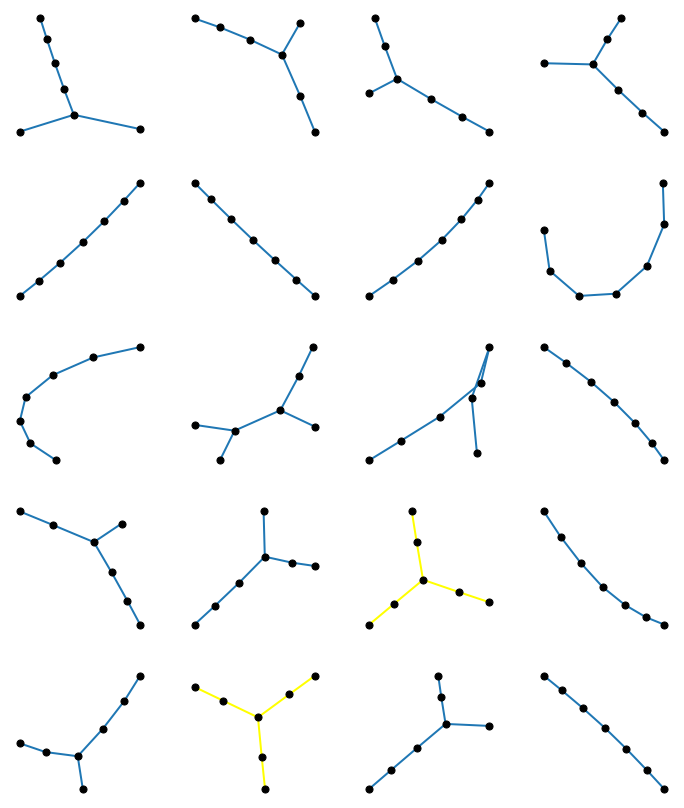

In [11]:
G = nx.Graph()
#nx.add_path(G,(0,1,2,3,0))
#nx.add_path(G,(0,2))
#nx.add_path(G,(1,3))
nx.add_path(G,(0,1,2,3,0,4,2,5,6))
nx.add_path(G,(1,3,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
trees = list(alg.spanning_trees(G))
N = matrixtree(G)
mod,rho,lamb = matrix_modulus(N,p=2, sigma=None)
la = np.round(lamb/sum(lamb),8)
n= len(G.nodes())
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
ncol = 4
nrow = int(np.ceil(len(trees)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
a=0

for i,tree in enumerate(trees):
    if la[i]>0:
        a=a+1
        H= nx.Graph(tree)
        plt.subplot(nrow,ncol,a)
        if svalue(H,w) < 2:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
        else:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='yellow', width=2, node_color = 'black')
            print(svalue(H,w))
        
print('number of fair trees=',a)
print('number of trees=',len(trees))


IndexError: tuple index out of range

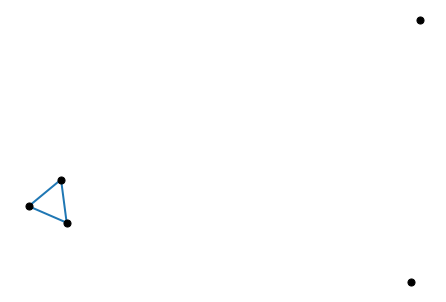

In [12]:
G = nx.random_geometric_graph(5, 0.6)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
trees = list(alg.spanning_trees(G))
N = matrixtree(G)
mod,rho,lamb = matrix_modulus(N,p=2, sigma=None)
la = np.round(lamb/sum(lamb),8)
n= len(G.nodes())
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
ncol = 4
nrow = int(np.ceil(len(trees)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
a=0
for i,tree in enumerate(trees):
    if la[i]>0:
        a=a+1
        H= nx.Graph(tree)
        plt.subplot(nrow,ncol,a)
        if svalue(H,w) < 2:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
        else:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='yellow', width=2, node_color = 'black')
            print(svalue(H,w))
print('number of fair trees=',a)
print('number of trees=',len(trees))

[0.1 0.1 0.1 0.1 0.1 0.1]
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
number of fair trees= 384
number of trees= 384


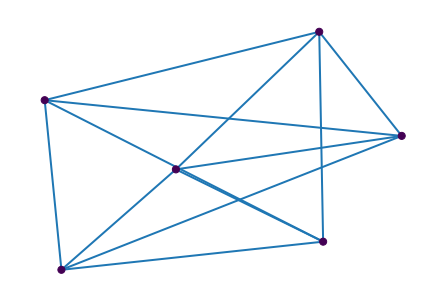

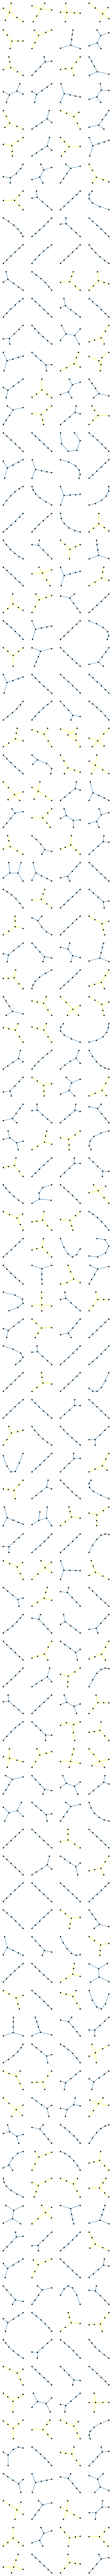

In [24]:
G = nx.random_regular_graph(4, 6, seed=124)
#nx.add_path(G,(0,1,2,3,0))
#nx.add_path(G,(0,2))
#nx.add_path(G,(1,3))
#nx.add_path(G,(0,1,2,3,0))
#nx.add_path(G,(1,3))

trees = list(alg.spanning_trees(G))
N = matrixtree(G)
mod,rho,lamb = matrix_modulus(N,p=2, sigma=None)
print(rho)
la = np.round(lamb/sum(lamb),8)
n= len(G.nodes())
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, node_color =np.round(rho,5), edge_color='tab:blue', width=2)
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
ncol = 4
nrow = int(np.ceil(len(trees)/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
a=0

for i,tree in enumerate(trees):
    if la[i]>0:
        a=a+1
        H= nx.Graph(tree)
        plt.subplot(nrow,ncol,a)
        if svalue(H,w) < 2:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
        else:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='yellow', width=2, node_color = 'black')
            print(svalue(H,w))
        
print('number of fair trees=',a)
print('number of trees=',len(trees))

[0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455
 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455]
4.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
4.0
2.0
number of fair trees= 287
number of trees= 2415


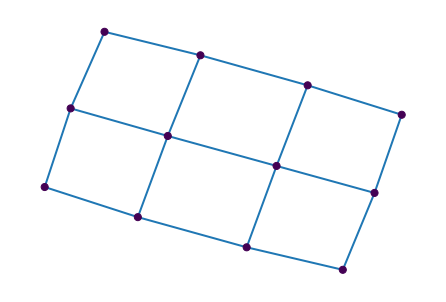

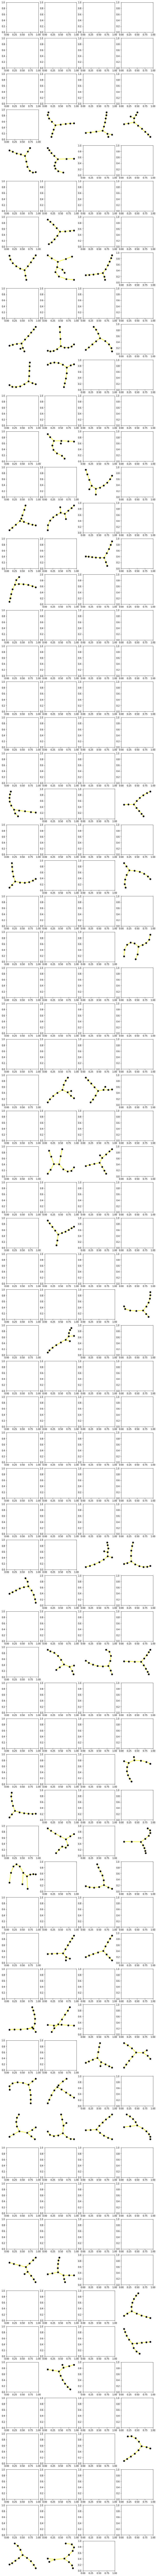

In [38]:
G = nx.Graph()
nx.add_path(G,(0,1,2,3,4,5,6,7,8,9,10,11,4))
nx.add_path(G,(2,5,10))
nx.add_path(G,(1,6,9))
nx.add_path(G,(0,7))
#nx.add_path(G,(1,3))

trees = list(alg.spanning_trees(G))
N = matrixtree(G)
mod,rho,lamb = matrix_modulus(N,p=2, sigma=None)
print(rho)
la = np.round(lamb/sum(lamb),8)
n= len(G.nodes())
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, node_color =np.round(rho,5), edge_color='tab:blue', width=2)
#G = nx.random_geometric_graph(n, 0.3, seed=seed)
w = np.ones(n)
ncol = 4
nrow = int(np.ceil(400/ncol))
plt.figure(figsize=(3*ncol,3*nrow))
a=0

for i,tree in enumerate(trees):
    if la[i]>0:
        a=a+1
        H= nx.Graph(tree)
        plt.subplot(nrow,ncol,a)
        if svalue(H,w) < 2:
            pos = nx.spring_layout(H)
            #nx.draw(H, pos, node_size=50, edge_color='tab:blue', width=2, node_color = 'black')
        else:
            pos = nx.spring_layout(H)
            nx.draw(H, pos, node_size=50, edge_color='yellow', width=2, node_color = 'black')
            print(svalue(H,w))
        
print('number of fair trees=',a)
print('number of trees=',len(trees))